# Defining Problem

The company want to know how much order fluctuate for a certain product towards many variables such as Clothing model, colour, etc. How every variables affect amount of order. Also the company want to predict number of order for a certain product in the future.

# Project Goals

1. Analyzing amount of order that influenced by many factors such as Country, Color etc.
2. Modelling amount of order to forecast the order in the future for every product

In [1]:
## Import Packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error

In [2]:
## import dataset
df = pd.read_csv('e-shop.csv', sep=';')
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [3]:
## checking the dimension of data
df.shape

(165474, 14)

__Source Dataset__ : 
£apczyñski M., Bia³ow¹s S. (2013) Discovering Patterns of Users' Behaviour in an E-shop - Comparison of Consumer Buying Behaviours in Poland and Other European Countries, “Studia Ekonomiczne”, nr 151, “La société de l'information : perspective européenne et globale : les usages et les risques d'Internet pour les citoyens et les consommateurs”, p. 144 - 153. 

# Data Description

Variables:

1. YEAR (2008)
2. MONTH -> from April (4) to August (8)
3. DAY -> day number of the month
4. ORDER -> sequence of clicks during one session
5. COUNTRY -> variable indicating the country of origin of the IP address with the 
    following categories:

    1-Australia
    2-Austria
    3-Belgium
    4-British Virgin Islands
    5-Cayman Islands
    6-Christmas Island
    7-Croatia
    8-Cyprus
    9-Czech Republic
    10-Denmark
    11-Estonia
    12-unidentified
    13-Faroe Islands
    14-Finland
    15-France
    16-Germany
    17-Greece
    18-Hungary
    19-Iceland
    20-India
    21-Ireland
    22-Italy
    23-Latvia
    24-Lithuania
    25-Luxembourg
    26-Mexico
    27-Netherlands
    28-Norway
    29-Poland
    30-Portugal
    31-Romania
    32-Russia
    33-San Marino
    34-Slovakia
    35-Slovenia
    36-Spain
    37-Sweden
    38-Switzerland
    39-Ukraine
    40-United Arab Emirates
    41-United Kingdom
    42-USA
    43-biz (*.biz)
    44-com (*.com)
    45-int (*.int)
    46-net (*.net)
    47-org (*.org)
6. SESSION ID -> variable indicating session id (short record)
7. PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
    1-trousers
    2-skirts
    3-blouses
    4-sale
8. PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product 
    (217 products)
9. COLOUR -> colour of product
    1-beige
    2-black
    3-blue
    4-brown
    5-burgundy
    6-gray
    7-green
    8-navy blue
    9-of many colors
    10-olive
    11-pink
    12-red
    13-violet
    14-white
10. LOCATION -> photo location on the page, the screen has been divided into six parts:
    1-top left
    2-top in the middle
    3-top right
    4-bottom left
    5-bottom in the middle
    6-bottom right
11. MODEL PHOTOGRAPHY -> variable with two categories: 
    1-en face
    2-profile
12. PRICE -> price in US dollars
13. PRICE 2 -> variable informing whether the price of a particular product is higher than 
    the average price for the entire product category

    1-yes
    2-no
14. PAGE -> page number within the e-store website (from 1 to 5)

In [4]:
df['session ID'].nunique()

24026

because there are alot of unique values in Session ID (also it is like primary Key) so we can drop this feature

In [5]:
df = df.drop(columns='session ID')

# Describe Data

In [6]:
dfDesc = []
for i in df.columns:
    if df[i].nunique() > 3 :
        bla = df[i].drop_duplicates().sample(3).values
    else :
        bla = df[i].drop_duplicates().values
    
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100), 2),
        df[i].nunique(),
        bla
    ])
    
pd.DataFrame(dfDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,year,int64,0,0.0,1,[2008]
1,month,int64,0,0.0,5,"[6, 8, 4]"
2,day,int64,0,0.0,31,"[10, 5, 18]"
3,order,int64,0,0.0,195,"[161, 32, 94]"
4,country,int64,0,0.0,47,"[46, 30, 34]"
5,page 1 (main category),int64,0,0.0,4,"[4, 1, 2]"
6,page 2 (clothing model),object,0,0.0,217,"[P36, B11, B24]"
7,colour,int64,0,0.0,14,"[10, 13, 9]"
8,location,int64,0,0.0,6,"[2, 4, 6]"
9,model photography,int64,0,0.0,2,"[1, 2]"


There is no nan values in every features

before we analyze it, we should classifying every features to three categories Numerical Continues, Numerical Categorical, Categorical

1. Numerical Continues :
    - year
    - order
    - price
2. Numerical Categorical :
    - month
    - day
    - country
    - page 1 (main category)
    - colour
    - location
    - model photography
    - price 2
    - page
3. Categorical :
    - page 2 (clothing model)

# Statistic Description

In [7]:
## converting categorical feature to string

df_stat = df.drop(columns=['year', 'order', 'price'])
df_stat = df_stat.astype('str')
df_stat[['year', 'order', 'price']] = df[['year', 'order', 'price']]

In [8]:
df_stat.describe().T

,count,mean,std,min,25%,50%,75%,max
year,165474.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
order,165474.0,9.817476,13.478411,1.0,2.0,6.0,12.0,195.0
price,165474.0,43.802507,12.548131,18.0,33.0,43.0,52.0,82.0


In [9]:
df_stat.describe(include='O')

,month,day,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price 2,page
count,165474,165474,165474,165474,165474,165474,165474,165474,165474,165474
unique,5,31,47,4,217,14,6,2,2,5
top,4,2,29,1,B4,2,1,1,1,1
freq,48199,7216,133963,49742,3579,29764,34532,122439,84695,93452


# Checking Outliers

In [10]:
Desc_outliers = []

for i in df_stat.describe().columns:
    Q1 = df_stat.describe()[i]['25%']
    Q3 = df_stat.describe()[i]['75%']
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5*IQR)
    lower_fence = Q1 - (1.5*IQR)
    hitung = 0
    
    for j in df[i]:
        if (j < lower_fence) | (j > upper_fence) :
            hitung+=1
    Desc_outliers.append([
        i,
        hitung,
        upper_fence,
        lower_fence
    ])

out = pd.DataFrame(Desc_outliers, columns=[
    "Data Features",
    "Jumlah Outliers",
    "Upper Fence",
    "Lower Fence"
])
out

,Data Features,Jumlah Outliers,Upper Fence,Lower Fence
0,year,0,2008.0,2008.0
1,order,11523,27.0,-13.0
2,price,1923,80.5,4.5


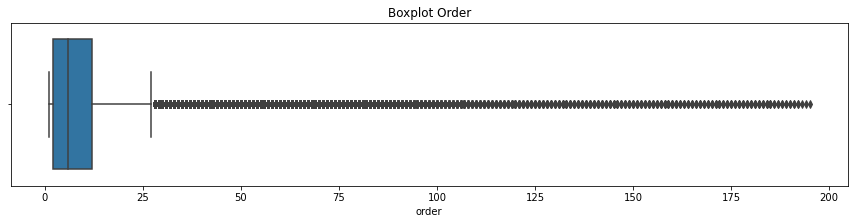

In [11]:
plt.figure(figsize=(15,3))
sns.boxplot(x=df["order"])
plt.title('Boxplot Order')
plt.show()

Order column has alot of outliers data

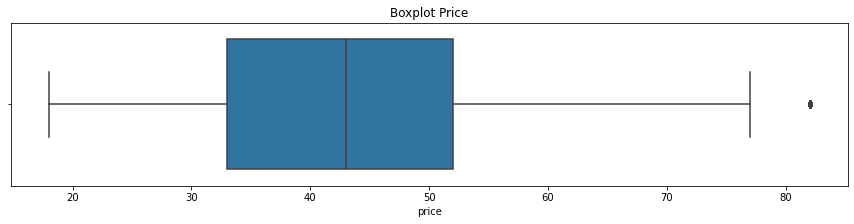

In [12]:
plt.figure(figsize=(15,3))
sns.boxplot(x=df["price"])
plt.title('Boxplot Price')
plt.show()

Price column has much less outliers data that order Column

# EXPLANATORY DATA ANALYSIS

Analyzing in 2 ways : Univariate and Multivatriate.

## Univariate

In [13]:
# defining numerical and categorical features
num = ['year', 'order', 'price']
cat = [i for i in df.columns if i not in num]

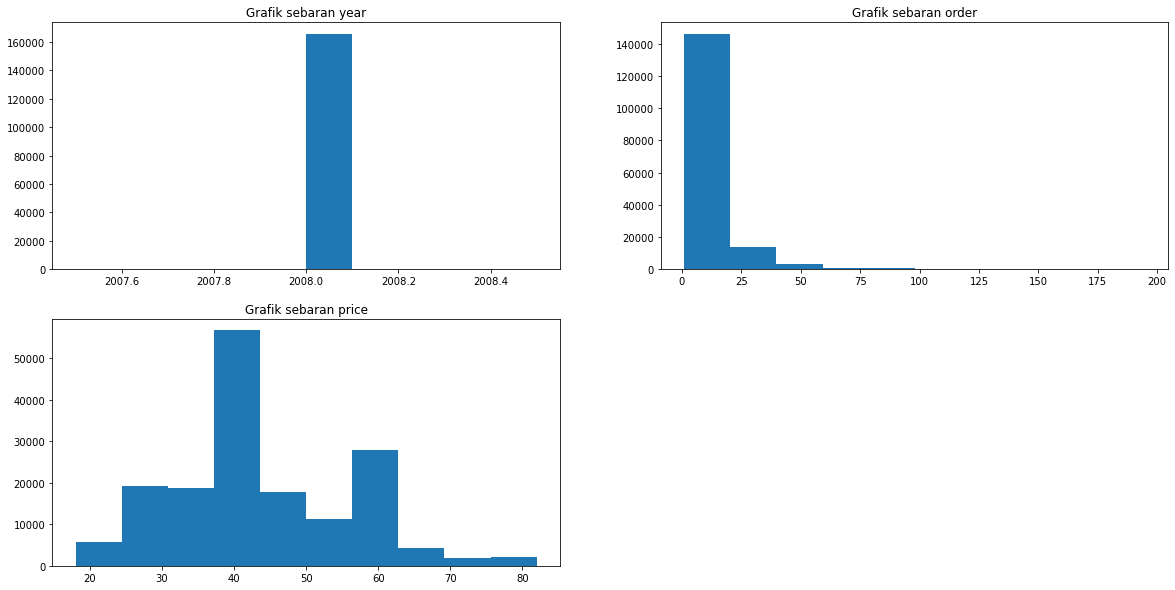

In [14]:
# plotting numerical continues features in histogram

plt.figure(figsize=(20,10))

for i in num:
    plt.subplot(2,2,(num.index(i))+1)
    plt.hist(df[i])
    plt.title('Grafik sebaran '+ i)

__Insight__ :
1. year column only have one value i.e. 2008
2. order column not distributed normally (positively skewed). Dominated by values in range 0 - 25
3. price column tend to be distributed normally. Dominated by values around 40 dollar

In [15]:
cat

['month',
 'day',
 'country',
 'page 1 (main category)',
 'page 2 (clothing model)',
 'colour',
 'location',
 'model photography',
 'price 2',
 'page']

In [16]:
# def function for table univariate categorical

def tab_cat (x):
    table_cat = pd.crosstab(index = df_stat[x], columns = 'Jumlah')
    return table_cat

In [17]:
tab_cat('month').sort_values(by = 'Jumlah', ascending=False)

col_0,Jumlah
month,
4,48199
5,35654
7,35231
6,32242
8,14148


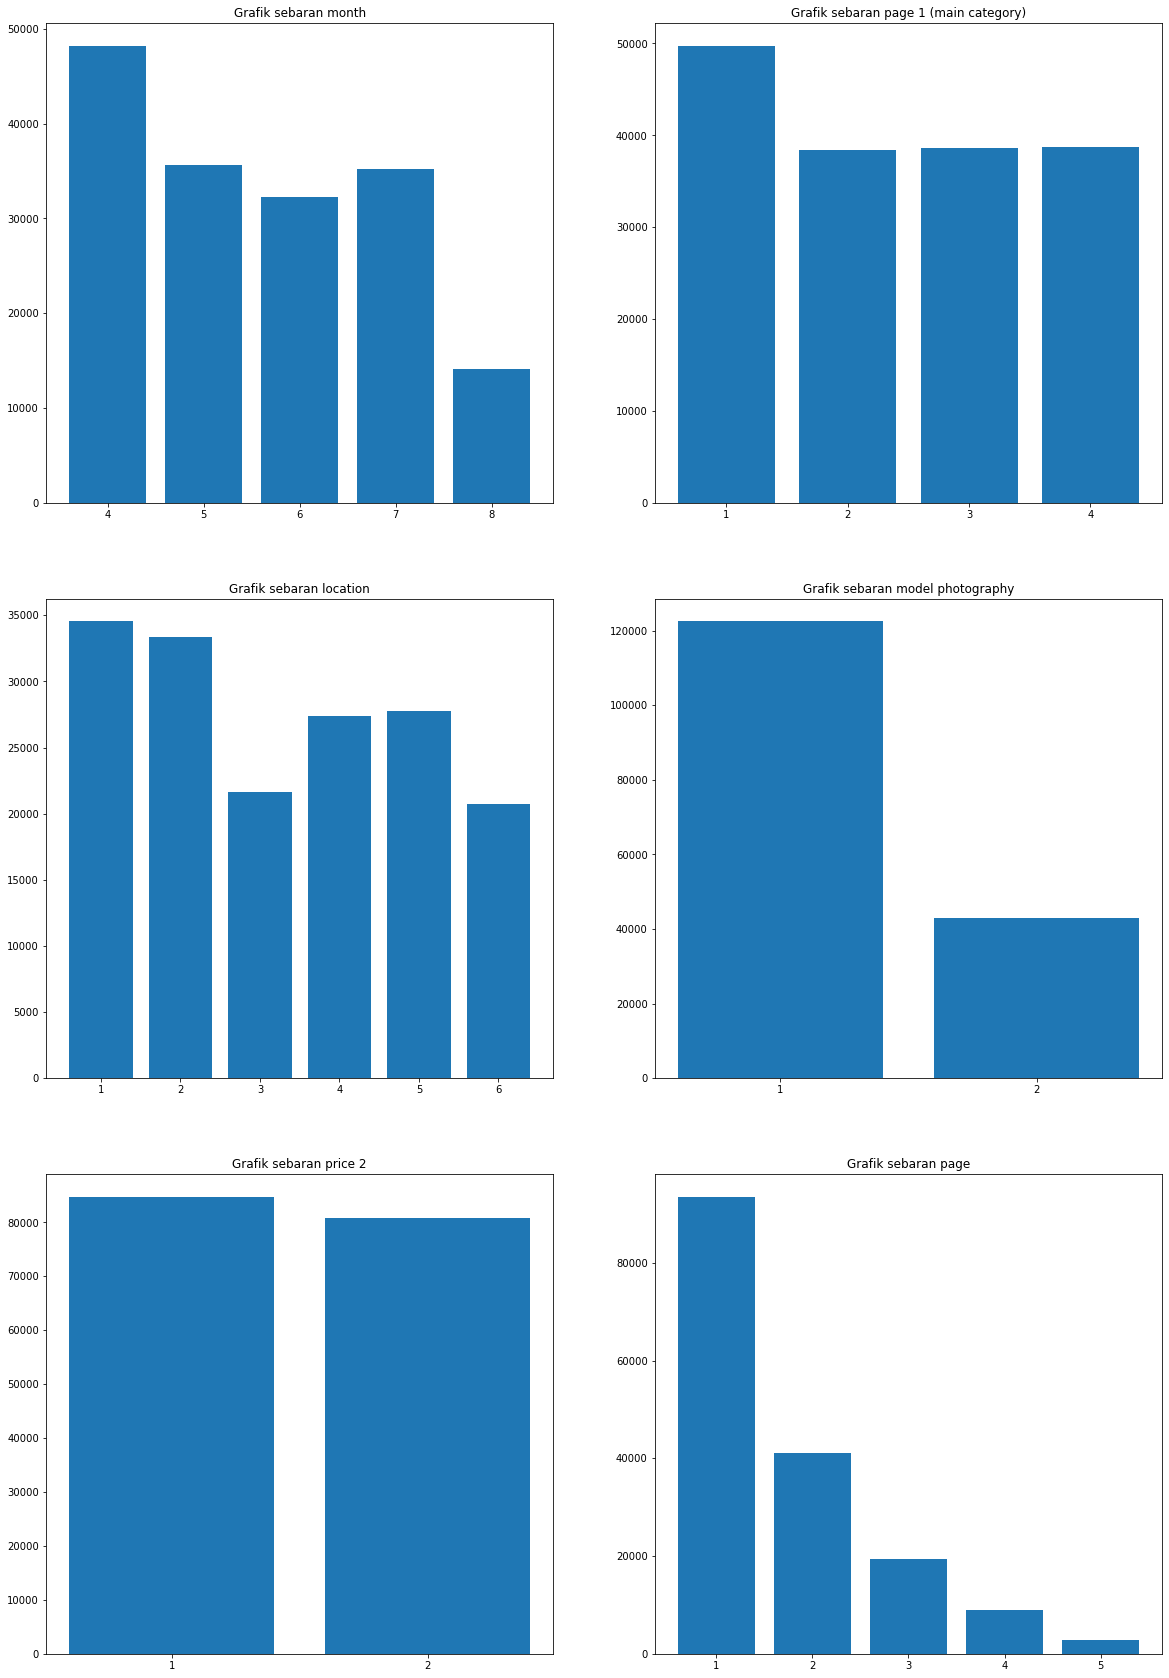

In [18]:
# plotting categorical features in barplot

plt.figure(figsize=(20,30))

tes = 1
for i in cat:
    if i not in ['day', 'country', 'page 2 (clothing model)', 'colour']:
        plt.subplot(3,2,tes)
        table_cat = pd.crosstab(index = df_stat[i], columns = 'Jumlah')
        table_cat =  table_cat.reset_index()
        plt.bar(table_cat[i], table_cat['Jumlah'])
        plt.title('Grafik sebaran '+ i)
        tes +=1

__Insight__ :
1. 'Month' feature dominated by April up to 48199. There is a difference between every month value.
2. 'Page 1 main category' feature dominated by category 1 (trousers) up to 49742. there is no difference between every value except for trousers.
3. 'location' feature dominated by value 1 wich is photo location in top left of the web page.There is a difference between every location value
4. 'model photography' feature dominated by value 1 wich is the model facing forward in the photo (en face). There is a difference between every model photography value
5. 'price 2' feature dominated by value 1 wich is the particular price is higher than  the average price for the entire product category. There is a no significant difference between every price 2 value.
6. 'page' feature dominated by value 1 wich is page 1 in the website. There is a  difference between every page value.

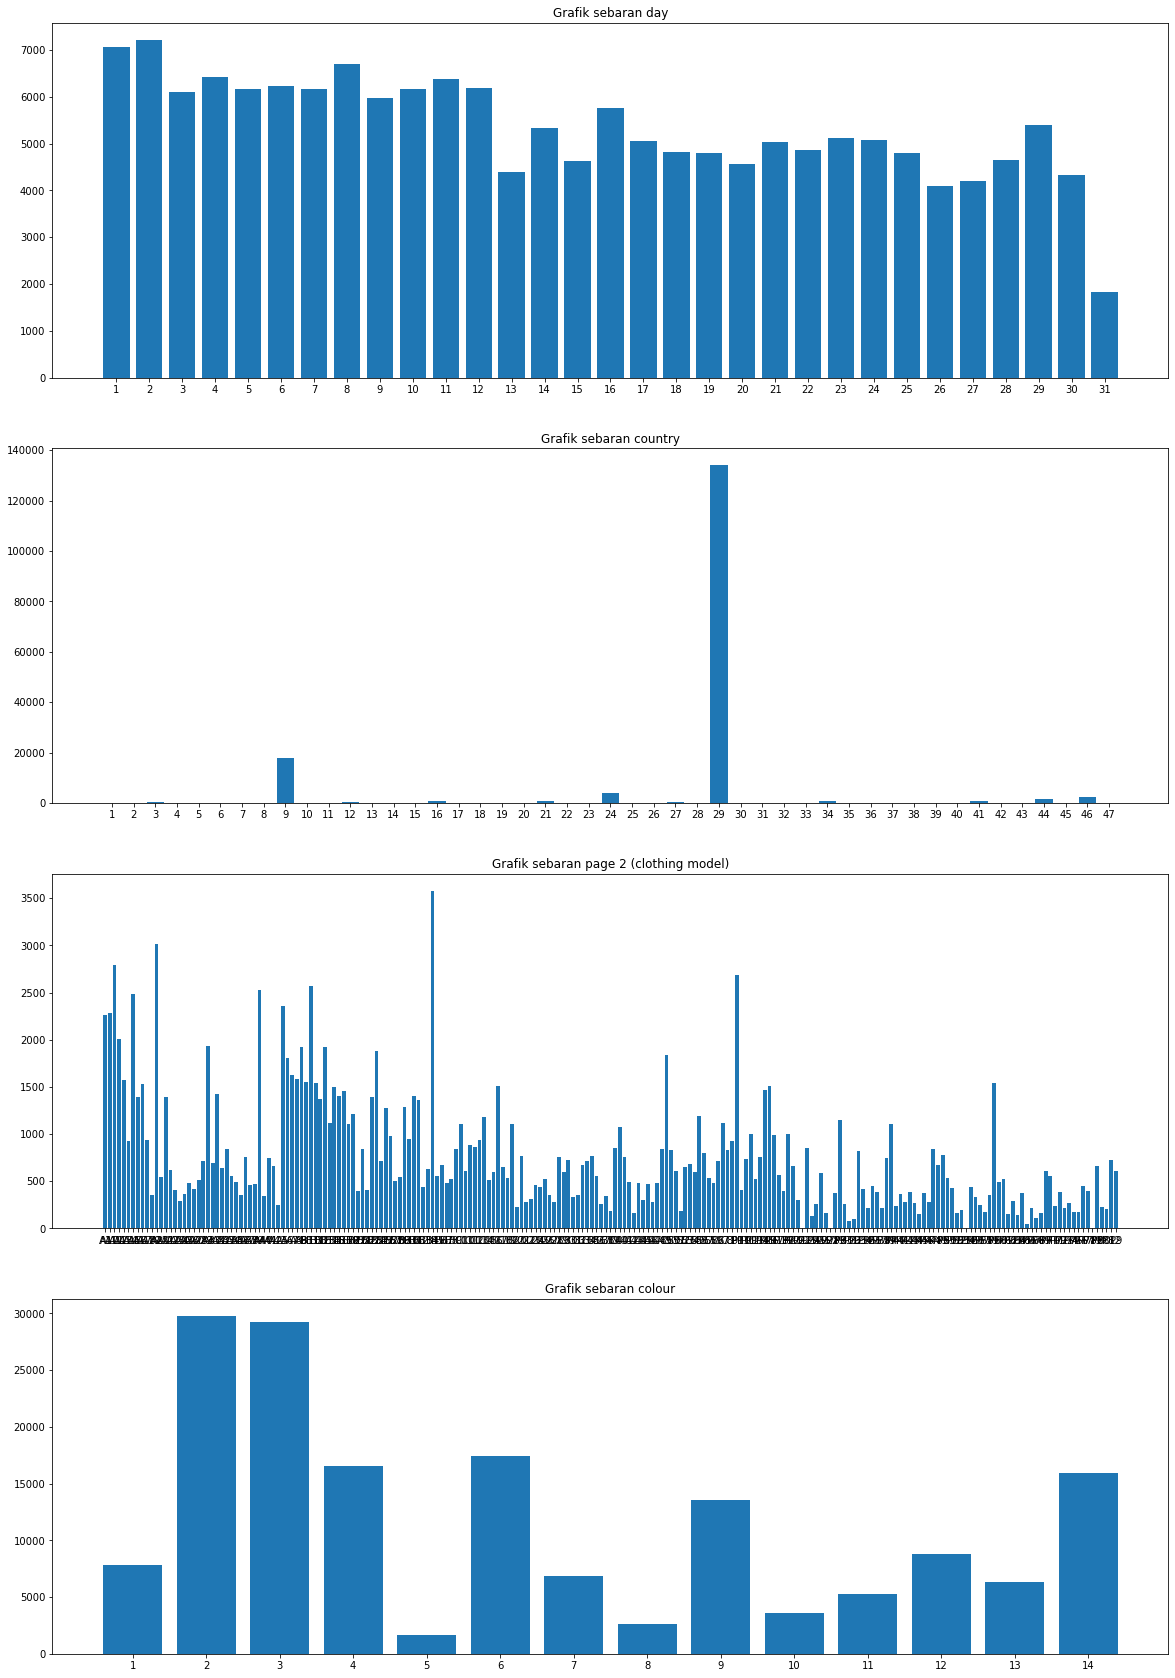

In [19]:
# plotting categorical features in barplot

plt.figure(figsize=(20,30))

tes = 1
for i in ['day', 'country', 'page 2 (clothing model)', 'colour']:
    plt.subplot(4,1,tes)
    table_cat = pd.crosstab(index = df[i], columns = 'Jumlah')
    table_cat =  table_cat.reset_index()
    table_cat[i] = table_cat[i].astype('str')
    plt.bar(table_cat[i], table_cat['Jumlah'])
    plt.title('Grafik sebaran '+ i)
    tes +=1

__Insight__ :
1. 'day' feature dominated by value 2 (wich is date 2) up to 7216. There is a difference between every day value.
2. 'country' feature dominated by value 29 (Poland) wich is wher the store stand, up to 133693. there is difference between every country value.
3. 'Page 2 (clothing model)' feature dominated by value B4 Model up to 3579.There is a difference between every Model value
4. 'color' feature dominated by value 2 wich is black up to 29764. There is a difference between every colour value

## MultiVariate

we want to know order feature (our target) response to every variables in the table.

we split the case into 3 method :

1. Numerical continues feature with order feature
2. Categorical feature with order feature
3. other

__Numerikal continues - order__

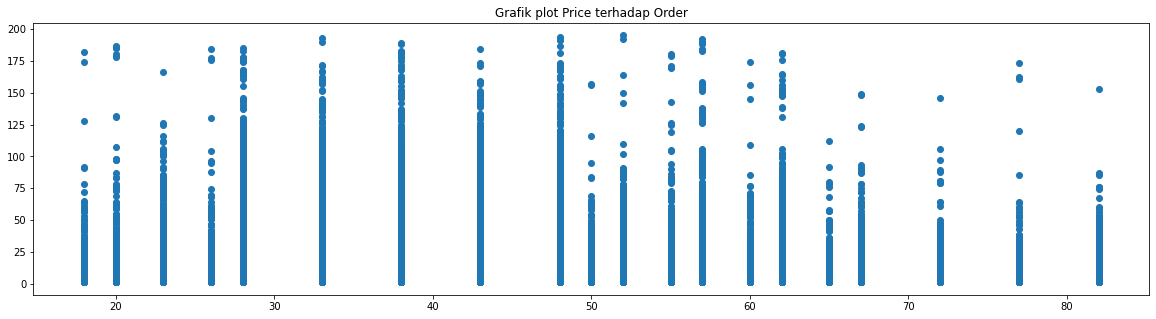

In [20]:
## plotting order in response with price 

plt.figure(figsize=(20,5))
plt.scatter(df['price'], df['order'])
plt.title('Grafik plot Price terhadap Order')
plt.show()

__Insight__ :
1. it seems that price value grouped in certain value. In this case there are 20 groups price from 0 to 100 dollars
2. from the graph we can't see any pattern (is it more price less order or else) so may be price has not affect order value individually

__categorikal - order__

In [21]:
# def fucntion for table order in response to categorical features

def table_cat_order (x):
    tabel = pd.pivot_table(df_stat, values='order', index=x, aggfunc=np.mean).round(2)
    tabel.rename(columns={x:'Rata-rata order di '+x}, inplace=True)
    return tabel

In [22]:
table_cat_order('location')

,order
location,
1,9.45
2,9.62
3,10.49
4,9.79
5,9.51
6,10.50


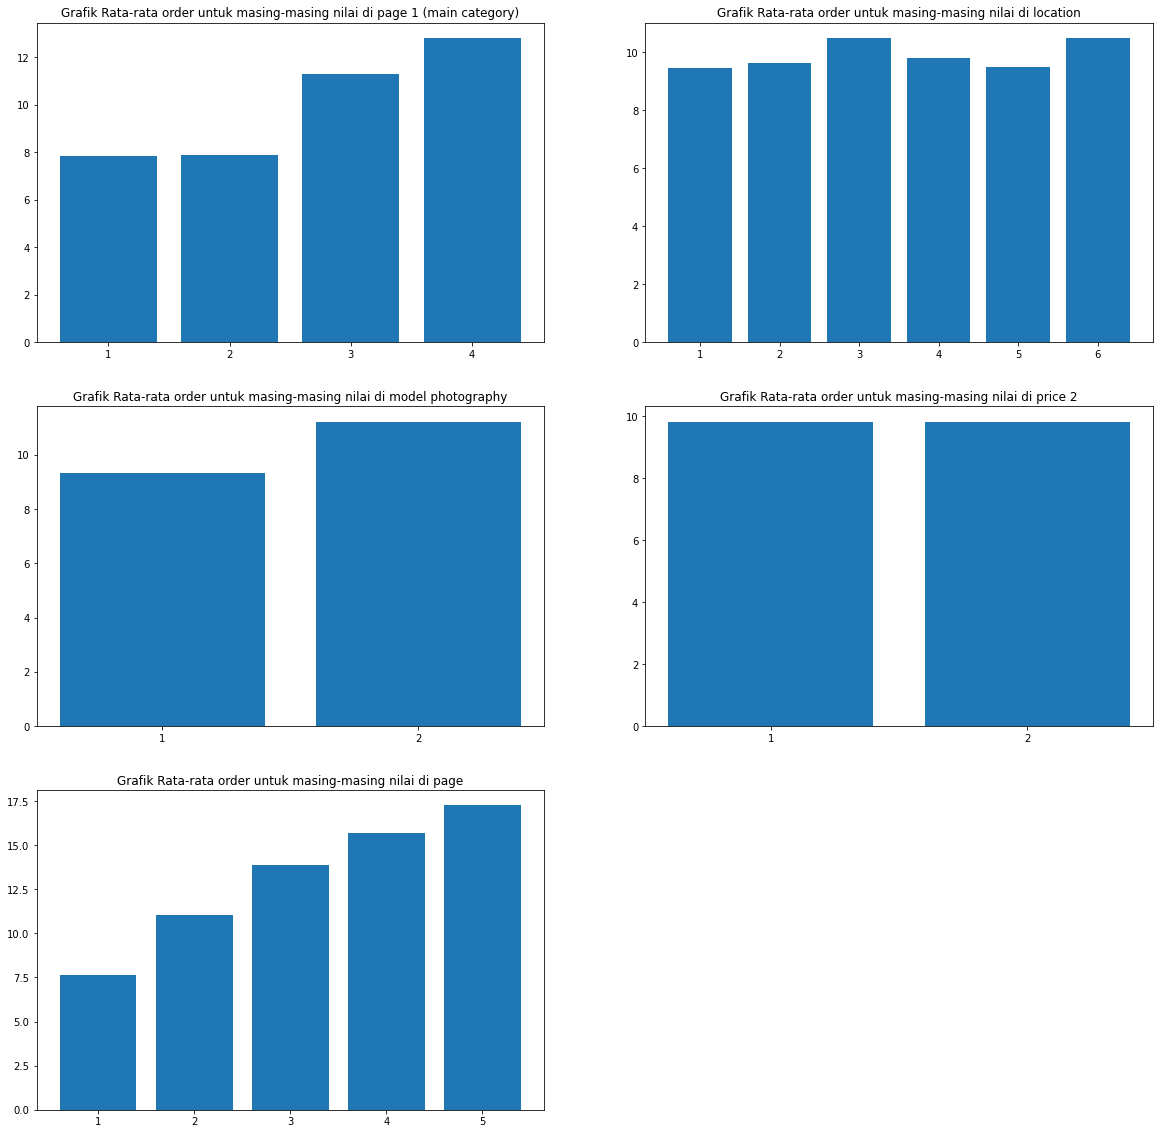

In [23]:
# plotting order value in response to 'page 1 (main category)', 'location', 'model photography', 'price 2', 'page' features

plt.figure(figsize=(20,20))
tes=1
for i in ['page 1 (main category)', 'location', 'model photography', 'price 2', 'page']:
    bla = pd.pivot_table(df_stat, values='order', index=i, aggfunc=np.mean).round(2)
    bla = bla.reset_index()
    plt.subplot(3,2,tes)
    plt.bar(bla[i], bla['order'])
    plt.title("Grafik Rata-rata order untuk masing-masing nilai di " + i )
    tes+=1

__Insight__ :

'page 1 (main category)', 'model photography' and 'page' have difference mean 'order' in every values significantly, but for  'location' and 'price 2' feature dont have significant differences on mean 'order' for every values in them.

In [24]:
cat

['month',
 'day',
 'country',
 'page 1 (main category)',
 'page 2 (clothing model)',
 'colour',
 'location',
 'model photography',
 'price 2',
 'page']

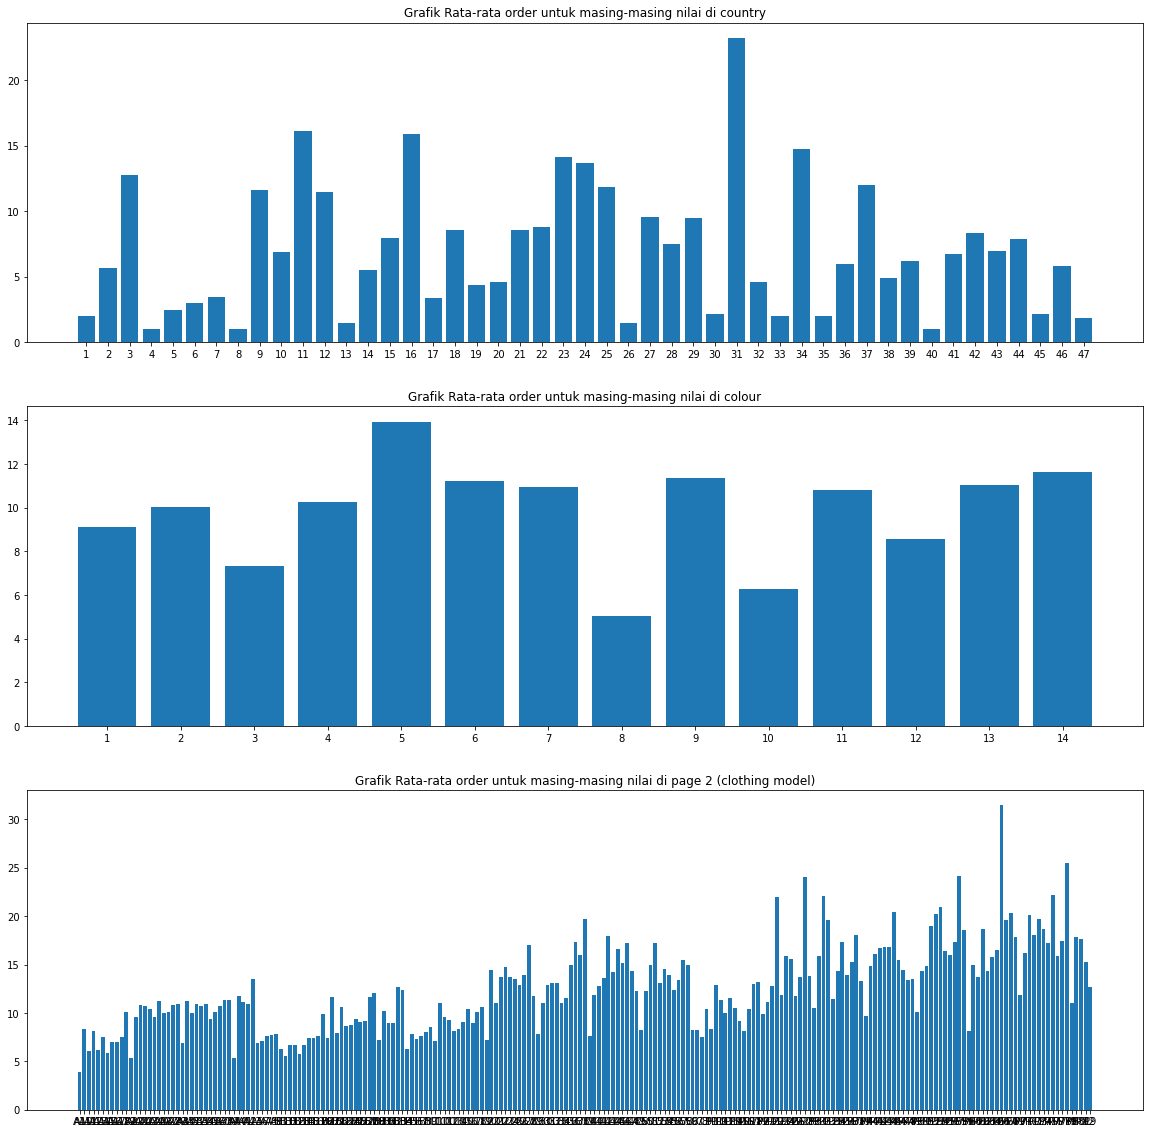

In [25]:
# plotting order value in response to 'country', 'colour', 'page 2 (clothing model)' features

plt.figure(figsize=(20,20))
tes=1
for i in ['country', 'colour', 'page 2 (clothing model)']:
    bla = pd.pivot_table(df, values='order', index=i, aggfunc=np.mean).round(2)
    bla = bla.reset_index()
    bla[i] = bla[i].astype('str')
    plt.subplot(3,1,tes)
    plt.bar(bla[i], bla['order'])
    plt.title("Grafik Rata-rata order untuk masing-masing nilai di " + i )
    tes+=1

In [26]:
table_cat_order('page 2 (clothing model)').sort_values(by='order', ascending=False).head(5)

,order
page 2 (clothing model),
P66,31.46
P79,25.50
P58,24.12
P28,24.00
P76,22.18


__Insight__ :

1. Most orders come from Country 31 / Romania up to 23.22 on average every session. there is differences on mean order for every country
2. Most orders for burgundy color product up to 13.94 on average every session. there is differences on mean order for every colour
3. Most order for P66 model up to 31.46 on average every session. there is differences on mean order for every Model

__Other__

- __Revenue analysis__

we want to know : the revenue (order * price) for every country and product

In [27]:
df['revenue'] = df['order'] * df['price']

In [28]:
df.head()

,year,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,revenue
0,2008,4,1,1,29,1,A13,1,5,1,28,2,1,28
1,2008,4,1,2,29,1,A16,1,6,1,33,2,1,66
2,2008,4,1,3,29,2,B4,10,2,1,52,1,1,156
3,2008,4,1,4,29,2,B17,6,6,2,38,2,1,152
4,2008,4,1,5,29,2,B8,4,3,2,52,1,1,260


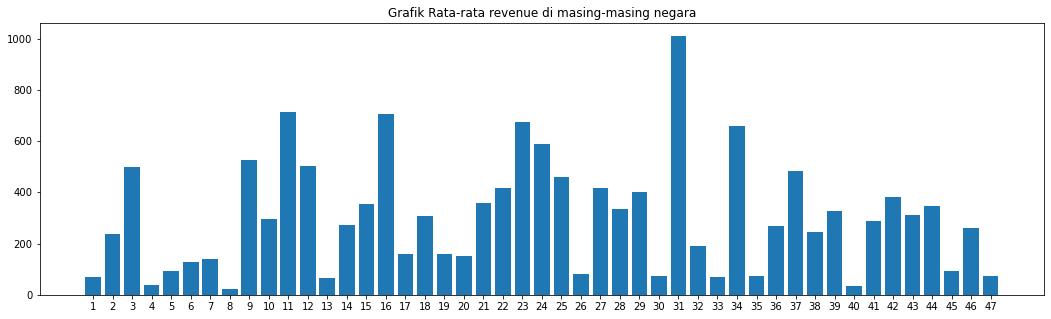

In [29]:
# plotting the revenue for every country

tab1 = pd.pivot_table(df, values='revenue', index='country', aggfunc=np.mean).round(2)
tab1 = tab1.reset_index()
tab1['country'] = tab1['country'].astype('str')
plt.figure(figsize=(18,5))
plt.bar(tab1['country'], tab1['revenue'])
plt.title("Grafik Rata-rata revenue di masing-masing negara")
plt.show()

In [30]:
tab1[tab1['revenue'] == tab1['revenue'].min()]

,country,revenue
7,8,23.0


__Insight__:
1. Country 31/ Romania give the most revenue to the store
2. Country 8/Cyprus give the least revenue to the store

In [31]:
tab2 = pd.pivot_table(df, values='revenue', index='page 2 (clothing model)', aggfunc=np.mean).round(2)
tab2 = tab2.reset_index()
tab2['page 2 (clothing model)'] = tab2['page 2 (clothing model)'].astype('str')
tab2.sort_values(by='revenue', ascending=False).tail()

,page 2 (clothing model),revenue
6,A15,193.51
81,C14,191.13
98,C3,181.05
4,A13,172.90
0,A1,108.25


__Insight__:
1. C39, P66, P79, P22 and P76 give the most revenue to the store in range 950 - 1550 dollars on average every session.
2. A1, A13, C3, C14 and A15 give the least revenue to the store in range 100 - 200 dollars on average every session.

- __Model product - country analysis__

we want to know the most ordered product for every country

In [32]:
tab3 = pd.crosstab(index=[df['country'], df['page 2 (clothing model)']], columns='Jumlah')
tab3.loc[31].sort_values(by='Jumlah', ascending=False).head(10)
# tab2.sort_values(by='revenue', ascending=False).tail()

col_0,Jumlah
page 2 (clothing model),
B31,6
B24,5
B16,5
B14,5
B23,4
B22,3
B20,3
P16,3
B30,3


__Insight__:

In romania (the country that give the most revenue) the most ordered products are in B Model Such as B31, B24, B16 etc.

__alternative solution__ : to increase order from romania, we can give more promotion or discount or etc. (base on marketing strategy) to the products

In [33]:
df['page 2 (clothing model)'].nunique()

217

In [34]:
df['page 1 (main category)'].nunique()

4

# MACHINE LEARNING

- Our Target is 'order' feature (continues).
- drop the revenue column because it representated by price column
- Recategorize page 2 (clothing model) feature into only the first alphabet such as A or B (because there are many unique values)
- recategorize Country

In [35]:
model = []
for i in df['page 2 (clothing model)']:
    model.append(i[0])

In [36]:
df['clothing model'] = model

In [37]:
df.head()

,year,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,revenue,clothing model
0,2008,4,1,1,29,1,A13,1,5,1,28,2,1,28,A
1,2008,4,1,2,29,1,A16,1,6,1,33,2,1,66,A
2,2008,4,1,3,29,2,B4,10,2,1,52,1,1,156,B
3,2008,4,1,4,29,2,B17,6,6,2,38,2,1,152,B
4,2008,4,1,5,29,2,B8,4,3,2,52,1,1,260,B


In [38]:
df.dtypes

year                        int64
month                       int64
day                         int64
order                       int64
country                     int64
page 1 (main category)      int64
page 2 (clothing model)    object
colour                      int64
location                    int64
model photography           int64
price                       int64
price 2                     int64
page                        int64
revenue                     int64
clothing model             object
dtype: object

In [39]:
df['country_cat'] = ''
df['country_cat'][(df['country'] == 6) | (df['country'] == 1)] = 'Australia'
df['country_cat'][(df['country'] == 4) | (df['country'] == 5)] = 'Karibia'
df['country_cat'][(df['country'] == 20) | (df['country'] == 40)] = 'Asia'
df['country_cat'][(df['country'] == 26) | (df['country'] == 42)] = 'America'
df['country_cat'][(42 < (df['country'])) |  (df['country']> 48) | (df['country']== 12)] = 'Other'

In [40]:
df['country_cat'][df['country_cat']==''] = 'Europe'

In [41]:
df['country_cat'].value_counts()

Europe       161117
Other          4161
America         172
Asia             11
Australia         8
Karibia           5
Name: country_cat, dtype: int64

In [78]:
df_model = df.drop(columns=['page 2 (clothing model)', 'revenue', 'country'])

In [79]:
df_model.head()

,year,month,day,order,page 1 (main category),colour,location,model photography,price,price 2,page,clothing model,country_cat
0,2008,4,1,1,1,1,5,1,28,2,1,A,Europe
1,2008,4,1,2,1,1,6,1,33,2,1,A,Europe
2,2008,4,1,3,2,10,2,1,52,1,1,B,Europe
3,2008,4,1,4,2,6,6,2,38,2,1,B,Europe
4,2008,4,1,5,2,4,3,2,52,1,1,B,Europe


### corr ratio
______________________

In [80]:
def corr_ratio(categories, measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range (0, cat_num):
        cat_measure = measurement[np.argwhere(fcat==1).flatten()]
        n_array[i] = len(cat_measure)
        y_avg_array[i] = np.average(cat_measure)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurement, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else :
        eta = np.sqrt(numerator/denominator)
    return eta

In [81]:
corr_ratio(df_model['country_cat'], df_model['order'])

0.0

In [84]:
corr_ratio(df_model['page 1 (main category)'], df_model['order'])

0.0

### One Hot encoding
______________________

do one hot encoding for 'country', 'page 1 (main category)', 'colour', 'location' column

In [60]:
df_model = pd.get_dummies(data=df_model, columns=['country_cat', 'clothing model'])

In [61]:
df_model.head()

,year,month,day,order,page 1 (main category),colour,location,model photography,price,price 2,...,country_cat_America,country_cat_Asia,country_cat_Australia,country_cat_Europe,country_cat_Karibia,country_cat_Other,clothing model_A,clothing model_B,clothing model_C,clothing model_P
0,2008,4,1,1,1,1,5,1,28,2,...,0,0,0,1,0,0,1,0,0,0
1,2008,4,1,2,1,1,6,1,33,2,...,0,0,0,1,0,0,1,0,0,0
2,2008,4,1,3,2,10,2,1,52,1,...,0,0,0,1,0,0,0,1,0,0
3,2008,4,1,4,2,6,6,2,38,2,...,0,0,0,1,0,0,0,1,0,0
4,2008,4,1,5,2,4,3,2,52,1,...,0,0,0,1,0,0,0,1,0,0


### Splitting Data
______________________

In [63]:
X = df_model.drop(columns=['order'])
y = df_model['order']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

### Def Eva Metrix
______________________

In [65]:
def Eva_Matrix(Model, X_train, X_test, y_train, y_test, Nama):
    y_pred_tr = Model.predict(X_train)
    r2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train, y_pred_tr)
    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    
    y_pred_ts = Model.predict(X_test)
    r2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test, y_pred_ts)
    MSE_ts = mean_squared_error(y_test, y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    
    data = {
    f"{Nama} Training" : [r2_tr, MAE_tr, MSE_tr, RMSE_tr],
    f"{Nama} Testing" : [r2_ts, MAE_ts, MSE_ts, RMSE_ts]
    }
    
    return pd.DataFrame(data = data, index = ['R2', 'MAE', 'MSE', 'RMSE'])

### Machine Learning Modelling
____________

__DT__

In [66]:
DT=DecisionTreeRegressor()

In [67]:
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [68]:
Eva_Matrix(DT, X_train, X_test, y_train, y_test, 'DT')

,DT Training,DT Testing
R2,0.357212,-0.120853
MAE,6.290472,8.331983
MSE,116.435594,205.973613
RMSE,10.790533,14.351781


Dalam hal ini yg dilihar r2. r2 dipakai untuk melihat keahlian model dalam mempelajari data baik data train dan test

r2 underfitting dan nilai tidak bagus untuk testing karena dibawah 0

__RF__

In [69]:
RF=RandomForestRegressor()

In [70]:
RF.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
Eva_Matrix(RF, X_train, X_test, y_train, y_test, 'RF')

,RF Training,RF Testing
R2,0.347249,-0.032606
MAE,6.472706,8.110958
MSE,118.240343,189.756893
RMSE,10.873838,13.775228


Dalam hal ini yg dilihar r2. r2 dipakai untuk melihat keahlian model dalam mempelajari data baik data train dan test

Dalam hal ini yg dilihar r2. r2 underfitting dan nilai tidak bagus untuk testing karena dibawah 0

__XGB__

In [72]:
XGB = XGBRegressor()

In [73]:
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
Eva_Matrix(XGB, X_train, X_test, y_train, y_test, 'XGB')

,XGB Training,XGB Testing
R2,0.190476,0.137884
MAE,7.381649,7.595280
MSE,146.638434,158.426866
RMSE,12.109436,12.586773


Dalam hal ini yg dilihar r2. r2 dipakai untuk melihat keahlian model dalam mempelajari data baik data train dan test

r2 sudah lebih baik dari yg RF dan DT tetapi r2 masih underfitting 

__TUNING__

In [86]:
param_XGB = {
    'n_estimators' : np.arange(100, 600, 100),
    'max_depth' : [1, 2, 3, 4,5],
    'learning_rate' : np.logspace(-3, 0, 4)
}

In [87]:
XGB_RS = RandomizedSearchCV(XGBRegressor(N_jobs=-1, random_state=42), param_XGB, n_iter=20, scoring='r2', verbose=1, n_jobs=-1, cv=3, random_state=42)

In [88]:
XGB_RS.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.8min finished


[14:49:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "N_jobs" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(N_jobs=-1, base_score=None,
                                          booster=None, colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estima...
                                          num_parallel_tree=None,
                                          random_state=42, reg_alpha=None,
                                          reg_lam

In [91]:
XGB_RS.best_params_

{'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1}

In [92]:
XGB_tune = XGB_RS.best_estimator_

In [93]:
Eva_Matrix(XGB_tune, X_train, X_test, y_train, y_test, 'XGB tune')

,XGB tune Training,XGB tune Testing
R2,0.162808,0.132393
MAE,7.465908,7.600479
MSE,151.650249,159.435960
RMSE,12.314636,12.626795


Dalam hal ini yg dilihar r2. r2 dipakai untuk melihat keahlian model dalam mempelajari data baik data train dan test

Setelah melakukan tuning, r2 XGB masih under fitting bahkan berkurang dari sebelum di tuning

__DALAM HAL INI LEBIH BAIK AMBIL YANG XGB TANPA TUNing__

# Exporting Model

In [94]:
import joblib

In [96]:
# joblib.dump(XGB, 'Model_XGB.jbl')